# Covid-19 Visualization, Prediction and Forecast


Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
df= pd.read_csv("covid19.csv")

Displaying data for data cleaning process

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50085,NaN,NaN,International,2020-10-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50086,NaN,NaN,International,2020-10-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50087,NaN,NaN,International,2020-10-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50088,NaN,NaN,International,2020-10-13,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#data.dtypes

Checking and taking care of null values

In [5]:
df.isna().sum()

iso_code                             289
continent                            578
location                               0
date                                   0
total_cases                          636
new_cases                            861
new_cases_smoothed                  1643
total_deaths                         636
new_deaths                           861
new_deaths_smoothed                 1643
total_cases_per_million              925
new_cases_per_million                925
new_cases_smoothed_per_million      1708
total_deaths_per_million             925
new_deaths_per_million               925
new_deaths_smoothed_per_million     1708
new_tests                          32049
total_tests                        31624
total_tests_per_thousand           31624
new_tests_per_thousand             32049
new_tests_smoothed                 29659
new_tests_smoothed_per_thousand    29659
tests_per_case                     31281
positive_rate                      30819
tests_units     

Dropping out unnwanted and highly correlated data features

In [6]:
bucket=["iso_code","new_cases","new_deaths","median_age","aged_70_older","new_tests","new_cases_per_million","new_deaths_per_million","total_cases_per_million","new_cases_smoothed_per_million","total_deaths_per_million","new_deaths_smoothed_per_million","total_tests_per_thousand","new_tests_per_thousand","new_tests_smoothed_per_thousand","tests_units","stringency_index","population_density","tests_per_case"]

In [7]:
df.drop(bucket,axis=1,inplace=True)

In [8]:
df["smoker"]=df["female_smokers"]+df["male_smokers"]

In [9]:
df.keys()

Index(['continent', 'location', 'date', 'total_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths_smoothed', 'total_tests',
       'new_tests_smoothed', 'positive_rate', 'population', 'aged_65_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'smoker'],
      dtype='object')

Only collecting data upto location zimbabwe

In [10]:
data=df.iloc[0:49512]

In [11]:
data

,continent,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_tests,new_tests_smoothed,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,smoker
0,Asia,Afghanistan,2019-12-31,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
1,Asia,Afghanistan,2020-01-01,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
2,Asia,Afghanistan,2020-01-02,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
3,Asia,Afghanistan,2020-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
4,Asia,Afghanistan,2020-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49507,Africa,Zimbabwe,2020-10-10,7994.0,19.429,229.0,0.143,NaN,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,32.3
49508,Africa,Zimbabwe,2020-10-11,8010.0,17.857,230.0,0.286,NaN,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,32.3
49509,Africa,Zimbabwe,2020-10-12,8011.0,18.000,230.0,0.286,NaN,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,32.3
49510,Africa,Zimbabwe,2020-10-13,8021.0,17.571,230.0,0.286,NaN,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,32.3


In [12]:
data.describe()

,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_tests,new_tests_smoothed,positive_rate,population,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,smoker
count,4.887600e+04,48099.000000,48876.000000,48099.000000,1.846600e+04,2.043100e+04,19271.000000,4.951200e+04,43676.000000,43758.000000,29085.000000,44330.000000,45932.000000,34596.000000,34151.000000,20674.000000,39974.000000,48879.000000,43063.000000,34151.000000
mean,5.994864e+04,774.192377,2277.792393,22.291739,1.736558e+06,2.389421e+04,0.064744,4.250274e+07,9.237833,20855.699146,12.242561,251.967077,8.047611,10.825321,32.618770,52.215298,3.107367,74.004821,0.724058,43.540230
std,3.780686e+05,4581.554413,12045.673475,116.124261,7.831773e+06,9.350538e+04,0.090179,1.565386e+08,6.332111,20457.797612,19.390688,117.816539,4.164463,10.511434,13.485649,31.831164,2.531417,7.404264,0.152993,18.522101
min,0.000000e+00,-552.000000,0.000000,-232.143000,1.000000e+00,0.000000e+00,0.000000,8.090000e+02,1.144000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000,8.000000
25%,7.000000e+01,0.714000,1.000000,0.000000,4.938250e+04,1.081000e+03,0.009000,1.399491e+06,3.552000,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,20.859000,1.300000,69.870000,0.606000,28.000000
50%,1.197000e+03,16.000000,24.000000,0.286000,2.210070e+05,3.819000e+03,0.029000,8.278737e+06,6.981000,14048.881000,1.800000,240.208000,7.110000,6.300000,31.400000,52.232000,2.500000,75.490000,0.754000,43.700000
75%,1.304500e+04,180.714000,272.000000,3.143000,8.702432e+05,1.348650e+04,0.084000,2.913681e+07,14.762000,32415.132000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000,56.500000
max,7.856714e+06,93198.571000,215902.000000,2715.143000,1.261239e+08,1.169107e+06,0.690000,1.439324e+09,27.049000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000,91.900000


In [13]:
data.isna().sum()

continent                         0
location                          0
date                              0
total_cases                     636
new_cases_smoothed             1413
total_deaths                    636
new_deaths_smoothed            1413
total_tests                   31046
new_tests_smoothed            29081
positive_rate                 30241
population                        0
aged_65_older                  5836
gdp_per_capita                 5754
extreme_poverty               20427
cardiovasc_death_rate          5182
diabetes_prevalence            3580
female_smokers                14916
male_smokers                  15361
handwashing_facilities        28838
hospital_beds_per_thousand     9538
life_expectancy                 633
human_development_index        6449
smoker                        15361
dtype: int64

In [14]:
data.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths_smoothed', 'total_tests',
       'new_tests_smoothed', 'positive_rate', 'population', 'aged_65_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'smoker'],
      dtype='object')

In [15]:
new_columns = data.columns[list(map(lambda x:"new" in x,data.columns))]
data[new_columns]=data[new_columns].fillna(0)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


TAking care of nan Values replacing it with Forward fill and zero 
> For features like total cases, we fill the null values with its previous values 
> For features like new cases and others, we simply fill null as 0 cause any other options are not suitable to implement and also the data are not affected.

In [16]:
new_columns = data.columns[list(map(lambda x:"total" in x,data.columns))]
data[new_columns]=data[new_columns].fillna(method='ffill').fillna(0)

In [17]:
data.drop(["female_smokers","male_smokers"], axis=1, inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
misc=["positive_rate","aged_65_older","cardiovasc_death_rate","extreme_poverty","diabetes_prevalence","smoker","handwashing_facilities","hospital_beds_per_thousand"]


In [19]:
data[misc]=data[misc].fillna(0)

In [20]:
miscc=["gdp_per_capita","life_expectancy","human_development_index"]

In [21]:
data[miscc]=data[miscc].fillna(0)

In [22]:
data.isna().sum()

continent                     0
location                      0
date                          0
total_cases                   0
new_cases_smoothed            0
total_deaths                  0
new_deaths_smoothed           0
total_tests                   0
new_tests_smoothed            0
positive_rate                 0
population                    0
aged_65_older                 0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
handwashing_facilities        0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
smoker                        0
dtype: int64

# Visualization

In [23]:
#data.style.background_gradient(cmap='Reds')[:10]

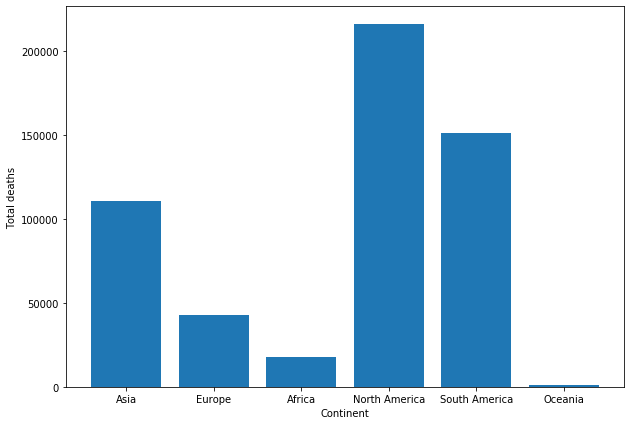

In [24]:
plt.figure(figsize=(10,7))
plt.bar(x=data["continent"], height=data["total_deaths"], data=data)
plt.xlabel("Continent")
plt.ylabel("Total deaths")
plt.show()

From bar graph, we can see that the most deaths due to covid 19 has been reported in North America and least deaths were reported in Oceania.

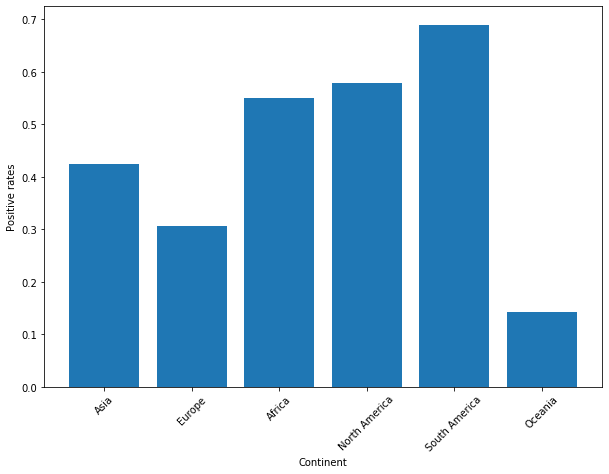

In [25]:
plt.figure(figsize=(10,7))
plt.bar(x=data["continent"], height=data["positive_rate"], data=data)
plt.xticks(rotation="45")
plt.xlabel("Continent")
plt.ylabel("Positive rates")
plt.show()

From bar graph, we can see that positive rates of covid 19 were highest in South America and least positive rates were reported in Oceania.

In [26]:
a=data.drop(["continent","location","date"],axis=1)

 Now, data should be Scaled/Standarize becacause that they helps to normalise the data within a particular range and also helps in speeding up the calculations in an algorithm. Here, we scale our data using Standard Scaler which is in sklearn.preprocessing.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler= StandardScaler()
scaled_a = scaler.fit_transform(a)

In [29]:
data[a.columns]=scaled_a

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
locate= data.groupby('location').max().sort_values('total_cases',ascending=False)[:10]

Top 10 most infected countries were displayed using groupby.

In [31]:
locate.reset_index(inplace=True)

In [32]:
locate

,location,continent,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_tests,new_tests_smoothed,positive_rate,...,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,smoker
0,United States,North America,2020-10-14,20.754693,14.747426,17.848185,23.520983,11.863473,16.347179,2.833669,...,1.092097,1.757988,-0.373613,-0.549616,0.735419,-0.661561,0.101112,0.522568,1.041974,0.539306
1,India,Asia,2020-10-14,19.111525,20.464085,9.050137,10.010497,8.297587,18.940322,1.516046,...,-0.324736,-0.589637,0.873490,0.418144,0.646929,1.145364,-0.765879,-0.306145,0.036303,-0.297192
2,Brazil,South America,2020-10-14,13.453268,10.103136,12.426136,9.387989,0.382589,1.445270,-0.390633,...,0.060593,-0.212594,-0.236431,-0.351389,0.142531,-0.661561,-0.119507,0.254137,0.457693,-0.080176
3,Russia,Europe,2020-10-14,3.372000,2.637658,1.730404,1.436393,4.676550,7.188797,0.477449,...,0.906423,0.311092,-0.442203,1.517401,-0.284436,-0.661561,2.144732,-0.043119,0.659536,2.038691
4,Colombia,South America,2020-10-14,2.301761,2.390271,2.162721,2.661446,0.117843,0.466481,-0.390633,...,-0.075617,-0.254268,-0.167841,-0.747674,-0.005691,1.322445,-0.309161,0.381146,0.415200,-0.466859
5,Argentina,South America,2020-10-14,2.282926,2.860474,1.864569,6.699616,-0.048574,0.195279,10.305369,...,0.458401,0.024653,-0.411026,-0.254968,-0.434871,-0.661561,0.964232,0.325298,0.691406,0.547198
6,Spain,Europe,2020-10-13,2.227200,2.337935,2.585682,7.391984,0.806432,1.838276,3.918771,...,1.696927,0.777997,-0.386084,-0.930890,-0.065422,-0.661561,0.178521,0.945932,0.925118,1.135114
7,Peru,South America,2020-10-14,2.115108,1.726629,2.603643,6.336596,-0.172829,-0.021598,-0.390633,...,-0.150037,-0.304279,-0.230196,-1.031567,-0.335318,-0.661561,-0.351736,0.331603,0.425823,-1.184986
8,Mexico,North America,2020-10-14,2.038891,1.625309,6.864242,6.796923,-0.070894,0.055863,8.584708,...,-0.194238,-0.053805,-0.292551,-0.537120,1.237604,2.003979,-0.436887,0.179373,0.510810,-0.068339
9,France,Europe,2020-10-14,1.855581,3.682326,2.563043,9.425417,-0.116983,3.207145,0.802979,...,1.739323,0.990827,-0.448439,-1.029317,-0.596366,-0.661561,1.343540,0.864862,0.960529,1.407371


<Figure size 720x504 with 0 Axes>

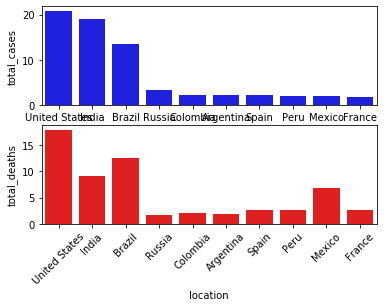

In [33]:

plt.figure(figsize=(10,7))
fig, ax= plt.subplots(2)

sns.barplot(x="location", y="total_cases", data=locate[:10], label="total cases", color="blue",ax=ax[0])
##plt.legend(ncol=2, loc='upper right', frameon=True)
plt.xticks(rotation="45")


sns.barplot(x="location", y="total_deaths", data=locate[:10], label="total deaths", color="red",ax=ax[1])
#plt.legend(ncol=2, loc='upper right', frameon=True)
plt.xticks(rotation="45")
plt.show()

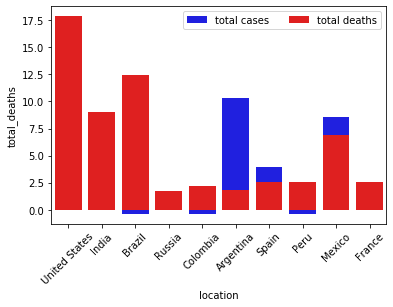

In [34]:
sns.barplot(x="location", y="positive_rate", data=locate[:10],label="total cases", color="blue")
sns.barplot(x="location", y="total_deaths", data=locate[:10], label="total deaths", color="red")
plt.legend(ncol=2, loc='upper right', frameon=True)
plt.xticks(rotation="45")
plt.show()

Above bar graph represents the top 10 maximum infected countries in which United States takes the lead followed by India , Brazil and so on. The blue color represents Total cases and red color represents total deaths where, US is highest in both cases.

In [35]:
confirmed = data.groupby('date').sum()['total_cases'].reset_index()
deaths = data.groupby('date').sum()['total_deaths'].reset_index()

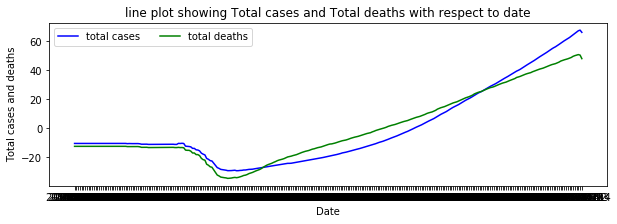

In [39]:
plt.figure(figsize=(10,3))
plt.title("line plot showing Total cases and Total deaths with respect to date")
plt.plot(confirmed["date"], confirmed["total_cases"], label="total cases", color="blue")
plt.plot(deaths["date"], deaths["total_deaths"],label="total deaths", color="green")
plt.xlabel("Date")
plt.ylabel("Total cases and deaths")
plt.legend(ncol=2, loc='upper left', frameon=True)
#plt.plot(data["date"], data["positive_rate"], color="red")

plt.show()

The graph shows that total cases and total deaths due to covid 19 goes parallel in starting months but in latest months the death count is decreasing.

# Train Test Splitting

Train test spliting should be done for prediction. 

In [42]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
X=data.drop(['total_cases','location','continent','date'], axis=1)
Y=data["total_cases"]

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5)

# Prediction

for prediction, we use Linear Regression model and Ridge. First, target is selected as total cases, X and Y are train set and test set respectively.

In [45]:
ridge = Ridge(alpha=0.01) 
ridge.fit(X_train, Y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
ridge100 = Ridge(alpha=100)
ridge100.fit(X_train, Y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
Ridge_train_score = ridge.score(X_train,Y_train)
Ridge_test_score = ridge.score(X_test, Y_test)
Ridge_train_score,Ridge_test_score

(0.9215395088974632, 0.9203160840491257)

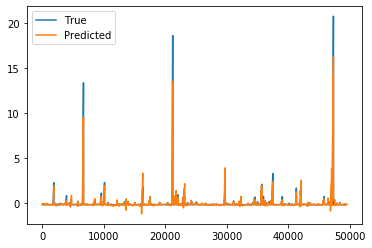

In [48]:
predicted= ridge.predict(X_test)
fig, ax = plt.subplots()
sns.lineplot(x=Y_test.index, y=Y_test.values, ax=ax)
sns.lineplot(x=Y_test.index.values, y=predicted, ax=ax)
plt.legend(['True','Predicted'])

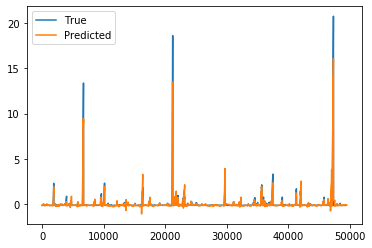

In [49]:
predicted= ridge100.predict(X_test)
fig, ax = plt.subplots()
sns.lineplot(x=Y_test.index,y=Y_test.values,ax=ax)
sns.lineplot(x=Y_test.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

# KNN Regresor

In [50]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(algorithm='ball_tree', 
                            leaf_size=50, 
                            metric='minkowski',
                            metric_params=None, 
                            n_jobs=-1, 
                            n_neighbors=14, 
                            p=2,
                            weights='uniform')
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.9893336626174362


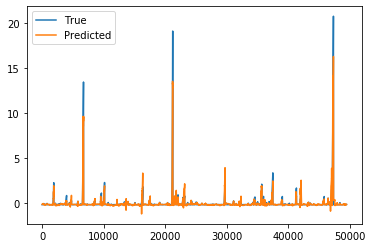

In [51]:
#Prediction on whole data
predicted = ridge.predict(data.drop(['total_cases','location','continent','date'],axis=1))
fig, ax = plt.subplots()
sns.lineplot(x=data.index, y=data['total_cases'].values, ax=ax)
sns.lineplot(x=data.index.values, y=predicted, ax=ax)
plt.legend(['True','Predicted'])

# Support Vecctor Regressor

In [52]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

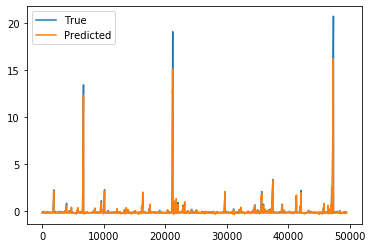

In [53]:
predicted = regressor.predict(data.drop(['total_cases','location','continent','date'],axis=1))
fig, ax = plt.subplots()
sns.lineplot(x=data.index, y=data['total_cases'].values,ax=ax)
sns.lineplot(x=data.index.values, y=predicted,ax=ax)
plt.legend(['True','Predicted'])

# XGBoost Regressor

In [55]:
!pip  install xgboost

     |████████████████████████████████| 148.9 MB 38 kB/s s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
xgb_reg=xgb.XGBRegressor()

prams={
    'learning_rate':[0.03,0.05,0.1],
    'n_estimators':[500,2000,4000],
    'max_depth':[5,7,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
# tscv = TimeSeriesSplit(n_splits=3)
random_clf=RandomizedSearchCV(xgb_reg, param_distributions=prams,verbose=1,
                                n_jobs=3,  n_iter=10)
random_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


In [ ]:
random_clf.best_score_

In [ ]:
random_clf.score(X_test,Y_test)

In [ ]:
random_clf.best_estimator_

In [ ]:
random_clf.best_params_

In [ ]:
predicted = random_clf.best_estimator_.predict(data.drop(['total_cases','location','continent','date'],axis=1))
fig, ax = plt.subplots()
sns.lineplot(x=data.index, y=data['total_cases'].values,ax=ax)
sns.lineplot(x=data.index.values, y=predicted,ax=ax)
plt.legend(['True','Predicted'])

In [ ]:
:
#Prediction on whole data
predicted = random_clf.best_estimator_.predict(X_test)
fig, ax = plt.subplots()
sns.lineplot(x=X_test.index,y=Y_test,ax=ax)
sns.lineplot(x=X_test.index.values,y=predicted,ax=ax)
plt.legend(['True','Predicted'])

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE for xgboostregressor: ")
print(mean_squared_error(predicted,Y_test))